## Scenario 
### Problem Statement
- **India has been fighting the COVID-19 pandemic since 30 January 2020 when the first case of COVID-19 was reported.  With  the  Unlock  4.0  phase  set  to  begin  in September, the need to be proactive is now more than ever. The objective is to create a Real-Time Face Mask Detector which can solve monitoring issues in crowded areas  such  as  Airports,  Metros,  etc.  usingCNN  and OpenCV.Dataset DescriptionThe dataset is an artificial set of face mask images**

#### Import Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D,Activation,AveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam



from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input

#### Load and Pre-process the dataset

In [ ]:
base_dir = r"D:\NIT\Exam_data_dataset\Deep Learning test -7\Scenario 1"

In [ ]:
IMAGE_SIZE = 224
BATCH_SIZE = 32

#### Pre-process the images present in the dataset using the TensorFlow preprocessing module 

In [ ]:
#pre-processing
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1. / 255,validation_split=0.2)

In [ ]:
train_generator = data_generator.flow_from_directory(base_dir,target_size=(IMAGE_SIZE, IMAGE_SIZE),batch_size=BATCH_SIZE,
    subset='training')

Found 1101 images belonging to 2 classes.


In [ ]:
val_generator = data_generator.flow_from_directory(base_dir,target_size=(IMAGE_SIZE, IMAGE_SIZE),batch_size=BATCH_SIZE,
    subset='validation')

Found 275 images belonging to 2 classes.


#### Encode the categorical data using an encoder of your choice because Machine Learning algorithms can only understand numerical data

In [ ]:
import os

training = []
xml_names = []
for dirname, _, filenames in os.walk(r"D:\NIT\Exam_data_dataset\Deep Learning test -7\Scenario 1\with_mask"):
    for filename in filenames:
        if os.path.join(dirname, filename)[-3:] != "xml":
            training.append(filename)
        else:
            xml_names.append(filename)
            
training = sorted(training)
print(len(training), "images")

690 images


In [ ]:
training

['0-with-mask.jpg',
 '1-with-mask.jpg',
 '10-with-mask.jpg',
 '100-with-mask.jpg',
 '101-with-mask.jpg',
 '103-with-mask.jpg',
 '104-with-mask.jpg',
 '105-with-mask.jpg',
 '106-with-mask.jpg',
 '107-with-mask.jpg',
 '108-with-mask.jpg',
 '109-with-mask.jpg',
 '11-with-mask.jpg',
 '110-with-mask.jpg',
 '111-with-mask.jpg',
 '112-with-mask.jpg',
 '113-with-mask.jpg',
 '114-with-mask.jpg',
 '115-with-mask.jpg',
 '116-with-mask.jpg',
 '117-with-mask.jpg',
 '118-with-mask.jpg',
 '119-with-mask.jpg',
 '12-with-mask.jpg',
 '120-with-mask.jpg',
 '121-with-mask.jpg',
 '122-with-mask.jpg',
 '123-with-mask.jpg',
 '124-with-mask.jpg',
 '125-with-mask.jpg',
 '126-with-mask.jpg',
 '127-with-mask.jpg',
 '128-with-mask.jpg',
 '129-with-mask.jpg',
 '13-with-mask.jpg',
 '131-with-mask.jpg',
 '132-with-mask.jpg',
 '133-with-mask.jpg',
 '134-with-mask.jpg',
 '135-with-mask.jpg',
 '136-with-mask.jpg',
 '137-with-mask.jpg',
 '138-with-mask.jpg',
 '139-with-mask.jpg',
 '14-with-mask.jpg',
 '140-with-mask.jpg

In [ ]:
import os

validation = []
xml_names = []
for dirname, _, filenames in os.walk(r"D:\NIT\Exam_data_dataset\Deep Learning test -7\Scenario 1\without_mask"):
    for filename in filenames:
        if os.path.join(dirname, filename)[-3:] != "xml":
            validation.append(filename)
        else:
            xml_names.append(filename)
            
validation = sorted(validation)
print(len(validation), "images")

686 images


In [ ]:
validation

['0.jpg',
 '1.jpg',
 '10.jpg',
 '100.jpg',
 '101.jpg',
 '102.jpg',
 '104.jpg',
 '105.jpg',
 '106.jpg',
 '107.jpg',
 '108.jpg',
 '109.jpg',
 '11.jpg',
 '110.jpg',
 '111.jpg',
 '112.jpg',
 '114.jpg',
 '115.jpg',
 '116.jpg',
 '117.jpg',
 '118.jpg',
 '119.jpg',
 '12.jpg',
 '120.jpg',
 '122.jpg',
 '123.jpg',
 '124.jpg',
 '125.jpg',
 '127.jpg',
 '128.jpg',
 '129.jpg',
 '13.jpg',
 '130.jpg',
 '131.jpg',
 '132.jpg',
 '133.jpg',
 '134.jpg',
 '135.jpg',
 '136.jpg',
 '137.jpg',
 '138.jpg',
 '139.jpg',
 '14.jpg',
 '140.jpg',
 '141.jpg',
 '142.jpg',
 '143.jpg',
 '145.jpg',
 '146.jpg',
 '148.jpg',
 '149.jpg',
 '15.jpg',
 '151.jpg',
 '152.jpg',
 '153.jpg',
 '154.jpg',
 '155.jpg',
 '156.jpg',
 '157.jpg',
 '158.jpg',
 '159.jpg',
 '16.jpg',
 '160.jpg',
 '161.jpg',
 '162.jpg',
 '163.jpg',
 '164.jpg',
 '166.jpg',
 '168.jpg',
 '169.jpg',
 '17.jpg',
 '170.jpg',
 '171.jpg',
 '172.jpg',
 '173.jpg',
 '174.jpg',
 '175.jpg',
 '176.jpg',
 '177.jpg',
 '178.jpg',
 '179.jpg',
 '18.jpg',
 '180.jpg',
 '181.jpg',
 '183

In [ ]:
label_en = LabelEncoder()

In [ ]:
X = LabelEncoder().fit_transform(training)

In [ ]:
y = LabelEncoder().fit_transform(validation)

In [ ]:
lb = LabelBinarizer()
labels = lb.fit_transform(validation)
labels = tf.keras.utils.to_categorical(labels)

#### Split the data into training and testing set using sklearn’s train_test_split function

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [690, 686]

In [ ]:
#construct the training image generator for data augmentation

In [ ]:
data_aug = ImageDataGenerator(rotation_range=20,zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15,
horizontal_flip=True,fill_mode="nearest")

#### Visualize the images present in the dataset

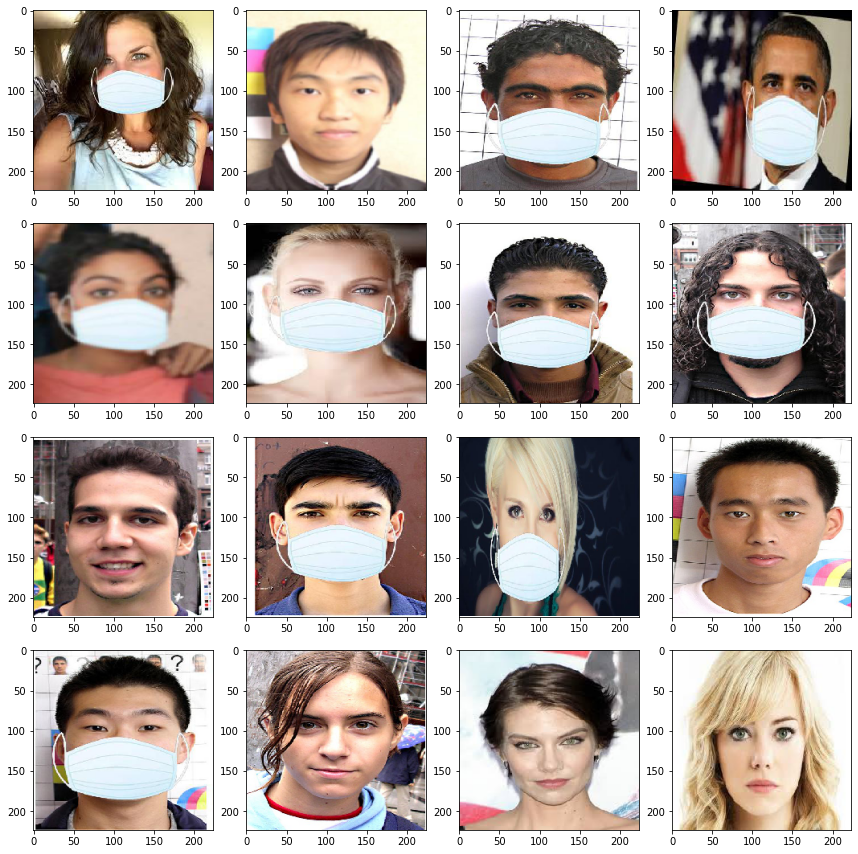

In [ ]:
plt.figure(figsize = (12,12))
for i in range(0,16):
    plt.subplot(4, 4, i+1)
    for X_batch, y_batch in train_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

#### Design a Convolutional Neural Network (CNN) Modelusing AveragePooling2D, Flatten, Dense, and Dropout layers

In [ ]:
##Hint:Use MobileNetv2 as the base model
base_model = MobileNetV2(weights = "imagenet",include_top = False,input_tensor=Input(shape = (224,224,3)))

In [ ]:
model = base_model.output
model = AveragePooling2D(pool_size = (7,7))(model)
model = Flatten(name = "flatten")(model)
model = Dense(128, activation = "relu")(model)
model = Dropout(0.5)(model)
model = Dense(2, activation = "softmax")(model)

model = Model(inputs = base_model.input, outputs = model)


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
base_model.layers

#### Compile the Modelusing Adam optimizer, Binary Crossentropy loss, and accuracy metric functions

In [ ]:
model.compile(optimizer = 'Adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                           

#### Train the Model for 30 epochs

In [ ]:
epochs = 30
Batch_size = 128
earlystop = EarlyStopping(monitor = "val_accuracy",patience = 5,min_delta = 0.01, mode = 'max')

In [ ]:
log_dir = "logs/fit/model0"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir,histogram_freq = 1)

In [ ]:
training = model_0.fit(X_train,y_train,batch_size = 128,epochs = 30,validation_split = 0.2,callbacks = tensorboard_callback)

Epoch 1/30
375/375 [==============================] - 2s 3ms/step - loss: 0.6538 - accuracy: 0.8416 - val_loss: 0.3551 - val_accuracy: 0.9046
Epoch 2/30
375/375 [==============================] - 1s 3ms/step - loss: 0.3501 - accuracy: 0.9033 - val_loss: 0.3071 - val_accuracy: 0.9153
Epoch 3/30
375/375 [==============================] - 1s 2ms/step - loss: 0.3152 - accuracy: 0.9126 - val_loss: 0.2898 - val_accuracy: 0.9195
Epoch 4/30
375/375 [==============================] - 1s 2ms/step - loss: 0.2994 - accuracy: 0.9170 - val_loss: 0.2813 - val_accuracy: 0.9192
Epoch 5/30
375/375 [==============================] - 1s 2ms/step - loss: 0.2895 - accuracy: 0.9186 - val_loss: 0.2759 - val_accuracy: 0.9244
Epoch 6/30
375/375 [==============================] - 1s 2ms/step - loss: 0.2829 - accuracy: 0.9211 - val_loss: 0.2710 - val_accuracy: 0.9245
Epoch 7/30
375/375 [==============================] - 1s 2ms/step - loss: 0.2782 - accuracy: 0.9228 - val_loss: 0.2712 - val_accuracy: 0.9233
Epoch 

#### Plot the training history using the Tensorflow History object returned by model.fit

In [ ]:
training.history['loss']

[0.6537503600120544,
 0.35012561082839966,
 0.3152114748954773,
 0.29944711923599243,
 0.2895127832889557,
 0.28287091851234436,
 0.2782173454761505,
 0.274311363697052,
 0.271206796169281,
 0.26873424649238586,
 0.26673662662506104,
 0.2647547423839569,
 0.26324522495269775,
 0.26185303926467896,
 0.2604830265045166,
 0.25923195481300354,
 0.258198618888855,
 0.2572501301765442,
 0.25657910108566284,
 0.2555549442768097,
 0.2547772526741028,
 0.2538788616657257,
 0.2533462345600128,
 0.252840518951416,
 0.2523123323917389,
 0.25198110938072205,
 0.2513865828514099,
 0.25097233057022095,
 0.2503070533275604,
 0.24987994134426117]

In [ ]:
training.history['accuracy']

[0.8416041731834412,
 0.903333306312561,
 0.9126041531562805,
 0.9169583320617676,
 0.9186458587646484,
 0.9211041927337646,
 0.9227916598320007,
 0.9242916703224182,
 0.9249374866485596,
 0.924875020980835,
 0.9264166951179504,
 0.9265416860580444,
 0.9279583096504211,
 0.9276666641235352,
 0.9281041622161865,
 0.9287499785423279,
 0.9291250109672546,
 0.9291874766349792,
 0.929770827293396,
 0.9303541779518127,
 0.9304166436195374,
 0.9309791922569275,
 0.9309791922569275,
 0.9312499761581421,
 0.9312916398048401,
 0.9315833449363708,
 0.9315416812896729,
 0.9318749904632568,
 0.9323958158493042,
 0.9323541522026062]

#### Make a plot for the loss function to visualize the change in the loss at every epoch

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


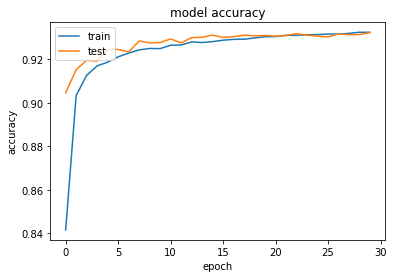

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Make a plot for the accuracy metric to visualize the accuracy at every epoch

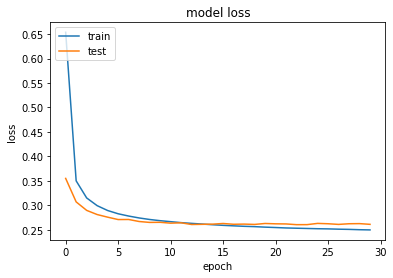

In [ ]:
print(training.history.keys())
# summarize training for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Evaluate the Model using model.evaluate method

In [ ]:
model_0.evaluate(X_test,y_test)
print('Test Accuracy:',test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.2730 - accuracy: 0.9270
Test Accuracy: 0.9269999861717224


In [ ]:
predIdxs = model_0.predict(X_test, batch_size=BATCH_SIZE)
predIdxs

array([[3.40902950e-08, 9.80723545e-14, 2.27054802e-08, ...,
        9.97425377e-01, 1.10312919e-06, 3.25985078e-04],
       [2.50411777e-05, 7.63467710e-07, 9.99415398e-01, ...,
        2.63425086e-25, 3.15397529e-07, 1.94514542e-20],
       [4.12002692e-07, 9.85023499e-01, 9.48483218e-03, ...,
        1.05889485e-05, 2.76068202e-03, 4.39437063e-05],
       ...,
       [1.40095846e-09, 2.64915617e-10, 3.24971211e-07, ...,
        8.77427810e-04, 4.50241333e-03, 2.05890797e-02],
       [8.96206720e-10, 1.11935816e-09, 7.87574339e-10, ...,
        1.15408672e-09, 3.69371730e-03, 4.09866141e-09],
       [1.32245566e-08, 9.10587625e-20, 7.68381597e-07, ...,
        6.47424895e-20, 4.64632603e-11, 7.00739637e-17]], dtype=float32)

#### Save the Entire Model using model.save

In [ ]:
model.save("mask_detector.model")

INFO:tensorflow:Assets written to: mask_detector\assets


C:\Users\Shivani Dussa\anaconda3\2.anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
C:\Users\Shivani Dussa\anaconda3\2.anaconda3\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


### Now that you have trained the model, test it using a webcam using OpenCV, and detect the Face Masks in  real-time

In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from imutils.video import VideoStream
import numpy as np
import imutils
import time
import cv2
import os

In [ ]:
prototxtPath = r"D:\NIT\Exam_data_dataset\Deep Learning test -7\Scenario 1\Face-Mask-Detection-master\Face-Mask-Detection-master\face_detector\deploy.prototxt"
weightsPath = r"D:\NIT\Exam_data_dataset\Deep Learning test -7\Scenario 1\Face-Mask-Detection-master\Face-Mask-Detection-master\face_detector\res10_300x300_ssd_iter_140000.caffemodel"
faceNet = cv2.dnn.readNet(prototxtPath, weightsPath)

In [ ]:
maskNet = load_model(r"D:\NIT\Exam_data_dataset\Deep Learning test -7\Scenario 1\mask_detector.model")

In [ ]:
def detect_and_predict_mask(frame, faceNet, maskNet):
    (h, w) = frame.shape[:2]
    blob = cv2.dnn.blobFromImage(frame, 1.0, (224, 224),
         (104.0, 177.0, 123.0))

# pass the blob through the network and obtain the face detections
    faceNet.setInput(blob)
    detections = faceNet.forward()
    print(detections.shape)

# initialize our list of faces, their corresponding locations,
# and the list of predictions from our face mask network
    faces = []
    locs = []
    preds = []

# loop over the detections
     for i in range(0, detections.shape[2]):
        confidence = detections[0, 0, i, 2]

# filter out weak detections by ensuring the confidence is greater than the minimum confidence
        if confidence > 0.5:
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")

# ensure the bounding boxes fall within the dimensions of the frame
            (startX, startY) = (max(0, startX), max(0, startY))
            (endX, endY) = (min(w - 1, endX), min(h - 1, endY))

# extract the face ROI, convert it from BGR to RGB channel ordering, resize it to 224x224, and preprocess it
            face = frame[startY:endY, startX:endX]
            face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
            face = cv2.resize(face, (224, 224))
            face = img_to_array(face)
            face = preprocess_input(face)

# add the face and bounding boxes to their respective lists
            faces.append(face)
            locs.append((startX, startY, endX, endY))

# only make a predictions if at least one face was detected
     if len(faces) > 0:
        faces = np.array(faces, dtype="float32")
        preds = maskNet.predict(faces, batch_size=32)

# return a 2-tuple of the face locations and their corresponding locations
      return (locs, preds)

In [ ]:
print("[INFO] starting video stream...")
vs = VideoStream(src=0).start()

# loop over the frames from the video stream
while True:
    
# grab the frame from the threaded video stream and resize it to have a maximum width of 400 pixels
    frame = vs.read()
    frame = imutils.resize(frame, width=400)

# detect faces in the frame and determine if they are wearing a face mask or not
    (locs, preds) = detect_and_predict_mask(frame, faceNet, maskNet)

# loop over the detected face locations and their corresponding locations
    for (box, pred) in zip(locs, preds):
        
# unpack the bounding box and predictions
        (startX, startY, endX, endY) = box
        (mask, withoutMask) = pred

# determine the class label and color we'll use to draw the bounding box and text
        label = "Mask" if mask > withoutMask else "No Mask"
        color = (0, 255, 0) if label == "Mask" else (0, 0, 255)

# include the probability in the label
        label = "{}: {:.2f}%".format(label, max(mask, withoutMask) * 100)

# display the label and bounding box rectangle on the output frame
        cv2.putText(frame, label, (startX, startY - 10),
            cv2.FONT_HERSHEY_SIMPLEX, 0.45, color, 2)
        cv2.rectangle(frame, (startX, startY), (endX, endY), color, 2)

# show the output frame
    cv2.imshow("Frame", frame)
    key = cv2.waitKey(1) & 0xFF

# if the `q` key was pressed, break from the loop
    if key == ord("q"):
        break

# do a bit of cleanup
cv2.destroyAllWindows()
vs.stop()


[INFO] starting video stream...
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 2

In [ ]:
# Run to see the results

### Thank You 